In [9]:
import pandas as pd
import seaborn as sns

Visualizing missing values

In [10]:
scat = pd.read_csv(
    '../Data/scat.csv'
)
scat.drop(columns='Unnamed: 0', inplace=True)

Scatterplot für fehlende Werte

PCA for missing values

In [11]:
chicago_raw = pd.read_parquet('../Data/chicago_train_data.parquet')

In [12]:
columns_with_na_values = chicago_raw.columns[chicago_raw.isna().any()].tolist()

In [13]:
masked_chicago_raw_data = (chicago_raw.isna()).astype(int)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_masked_chicago_raw_data = pca.fit_transform(masked_chicago_raw_data)

<Axes: >

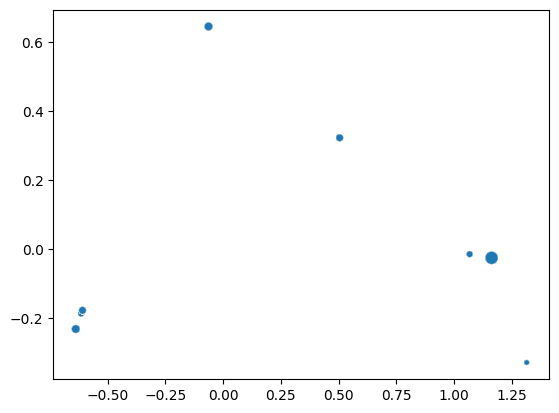

In [16]:
sns.scatterplot(
    x = pca_masked_chicago_raw_data[:, 0],
    y = pca_masked_chicago_raw_data[:, 1],
    alpha=0.4,
    s = percentage_missing_per_date*1000
)

Deleting null values

In [21]:
chicago_raw.shape

(5733, 146)

In [22]:
chicago_raw.isna().astype(int).sum(axis='rows').sort_values(ascending=False).head(10)

Homan (Green Line)                     5702
Cermak-McCormick Place (Green Line)    5113
Morgan (Green & Pink Lines)            4138
Oakton-Skokie (Yellow Line)            4108
Washington (Red Line)                  2780
Conservatory (Green Line)               151
Cermak-Chinatown (Red Line)              30
79th (Red Line)                          30
95th/Dan Ryan (Red Line)                 30
Sox-35th (Red Line)                      30
dtype: int64

Impute with global mean

In [24]:
indices_of_missing = chicago_raw[chicago_raw['87th (Red Line)'].isna()].index.tolist()

In [25]:
chicago_raw.loc[indices_of_missing[0], '87th (Red Line)']

nan

Impute with concept most common

KNN Imputation

Imputing with trees

Lineare Modelle fuer Imputation

<Axes: xlabel='79th (Red Line)', ylabel='79th (Red Line)'>

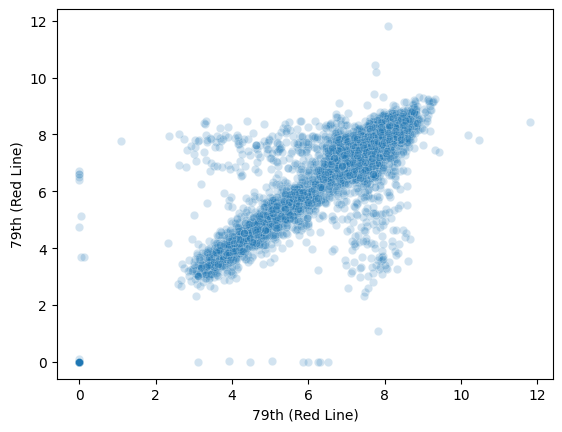

In [27]:
from seaborn import scatterplot
scatterplot(
    x=chicago_raw['79th (Red Line)'],
    y=chicago_raw['79th (Red Line)'].shift(7),
    alpha=0.2
)

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = chicago_raw[['79th (Red Line)']].dropna()
y = X['79th (Red Line)'].shift(7)
lin_reg.fit(
    X=X.iloc[7:,:],
    y=y[7:]
)

LinearRegression()